# 2 - Probability Distributions

After covering the libraries review in the first notebook, we introduce basic notions about random numbers, sampling and probability distributions. These concepts are the stepping-stone to understand the foundations of the EM method. By following this quick introduction, you will be well-equipped to understand this project as whole. Our aim is to map these basic probability-related fundamentals to `numpy` manipulation and plots the results with `matplotlib`. 

## Contents
### [A. Random number generation](#randomnum)
### [B Sampling](#sampling)
### [C Probability distributions](#probability)

<a id="randomnum"></a>
### A Random number generation

Random numbers are essential to perform simulations and study random variables and stochastic processes. The generation of random numbers allows us to implement an *apparent* randomness and unpredictable behaviour into our experiments. Considering a collection of random numbers, we can effectively incorporate uncertainty and variability into simulations of real-world systems, enabling the assessment of such systems in a probabilistic manner. 

Note the word *apparent* above. We have highlighted it because we want to emphasise that the random number generation is *not so* random. In fact, modern computers and software packages allow us to draw a collection of numbers that seems random. However, there is always an underlying deterministic algorithm generating this collection. Therefore, from a theoretical point of view, the generated numbers have an underlying pattern. Nevertheless, for most applications, the obtained numbers collection if sufficiently random to utilise them in our simulations to mimic a random behaviour. One of the advantages of these *pseudo-random* number generation algorithms is that they provide consistency and replicability. With these *pseudo-random* algorithms, we can repeat a simulation utilising these random numbers as many times as we want and produce consistent results as the same random numbers will be used each time. 

We proceed showing how to manipulate random numbers collection with `numpy`.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Pick a single random number between [0, 1), this notation means that 0 can be chosen while 1 cannot.
# Running this cell multiple times gives us different numbers
random_number = np.random.random()
print("Random number: ", random_number)

Random number:  0.9623313119702456


In [3]:
# We can also generate an array of random numbers
random_array = np.random.random(size=5)
print("Random array: ", random_array)

# Or generate another sequence with different conditions
random_integer_array = np.random.randint(low=0, high=10, size=10) # Pick 10 random integers between [0, 10)
print("Random integer array: ", random_integer_array)

Random array:  [0.95217277 0.4743576  0.93325784 0.57184322 0.42409419]
Random integer array:  [2 6 8 1 6 4 2 7 7 7]


In [4]:
# Each call produces a different sequence as commented above
random_array_1 = np.random.random(size=5)
print("Random array 1: ", random_array_1)

random_array_2 = np.random.random(size=5)
print("Random array 2: ", random_array_2)

Random array 1:  [0.18591944 0.10314847 0.91532575 0.20042843 0.54959214]
Random array 2:  [0.84954032 0.89349619 0.58228512 0.82875446 0.42392148]


In [5]:
# However, for replicability purposes we can fix the random numbers we obtain.
# This is done by setting the random seed, i.e., the initial state of the underlying generator algorithm

np.random.seed(seed=14)
random_array_1 = np.random.random(size=5)
print("Random array 1: ", random_array_1)

np.random.seed(seed=14)  # Executing this line before generating the random numbers, ensures the same sequence.
random_array_2 = np.random.random(size=5)
print("Random array 2: ", random_array_2)

Random array 1:  [0.51394334 0.77316505 0.87042769 0.00804695 0.30973593]
Random array 2:  [0.51394334 0.77316505 0.87042769 0.00804695 0.30973593]


In [6]:
# And it can be called at any time
np.random.seed(seed=14)
random_array_1 = np.random.random(size=5)
print("Random array 1: ", random_array_1)

random_array_2 = np.random.random(size=10)
print("Random array 2: ", random_array_2)

# do other stuff.. 

np.random.seed(seed=14)
random_array_3 = np.random.random(size=5)
print("Random array 3: ", random_array_3)

Random array 1:  [0.51394334 0.77316505 0.87042769 0.00804695 0.30973593]
Random array 2:  [0.95760374 0.51311671 0.31828442 0.53919994 0.22125494 0.80648136
 0.34225463 0.53888885 0.00587379 0.67315248]
Random array 3:  [0.51394334 0.77316505 0.87042769 0.00804695 0.30973593]


<a id="sampling"></a>
### B Sampling

In the previous subsection, we have generated collections of random numbers. Under the hood, this generation involves sampling from a specific probability distribution or population. Random sampling is the process of choosing a subset of items from a larger population with the likelihood of each value determined by the probability distribution. For a certain probability distributions, such as the one used to draw the random samples in the previous section, each value in the range of the probability distribution has the same probability of being generated. We will discuss more about probability in the next subsection. Random sampling is useful to make inferences about the entire population or distribution based on the characteristics observed in the sample.

Below, we implement small pieces of code using `numpy` to highlight the importance of random sampling.

In [7]:
# Sampling from an array
population = np.array([1, 2, 3, 4, 5])
sample = np.random.choice(population, size=3)
print("Random sample using choice: ", sample)

Random sample using choice:  [1 1 3]


In [8]:
# The previous example is equivalent to use directly
sample = np.random.randint(low=1, high=6, size=3)  # Draw 3 integer numbers between [1, 6)
print("Random sample using randint: ", sample)

Random sample using randint:  [2 4 1]


In [9]:
# In the previous samples, each number [1, 2, 3, 4, 5] had the same chance of being selected (1/5)
# However, we can specify a specific chance for each item
# Note how 5 appears more frequently
chances = [0.1, 0.1, 0.1, 0.2, 0.5]  # must sum 1
uneven_sample = np.random.choice(population, size=30, p=chances)
print("Uneven sample: ", uneven_sample)

Uneven sample:  [5 4 5 1 5 3 5 4 5 5 5 2 4 4 5 3 5 5 2 4 5 1 5 1 5 5 4 5 4 2]


Number of appearances:  {'1': 3, '2': 3, '3': 2, '4': 7, '5': 15}


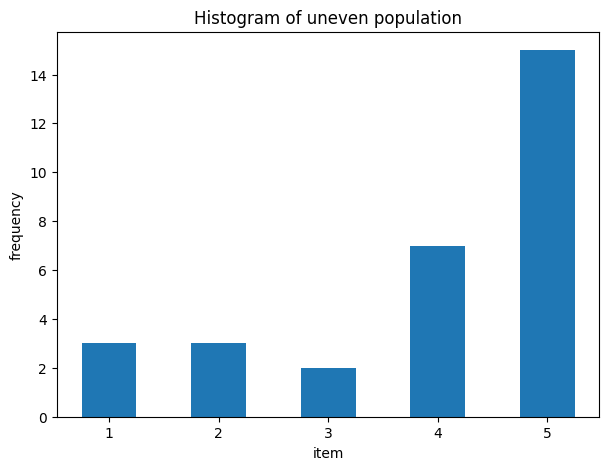

In [10]:
# We can count the number of appearances of each item
counter = {str(k): 0 for k in population}
for i in uneven_sample:
    counter[str(i)] += 1

print("Number of appearances: ", counter)

fig, ax = plt.subplots(figsize=(7,5))
ax.hist(uneven_sample, bins=[0.75, 1.25, 1.75, 2.25, 2.75, 3.25, 3.75, 4.25, 4.75, 5.25])
ax.set_xlabel("item")
ax.set_ylabel("frequency")
ax.set_title("Histogram of uneven population")

plt.show()

As mentioned earlier, random sampling is useful to infer information from a population. For the sake of clarifying this concept, tet us consider the following experiment in which we have a bag containing **100** coloured marbles: **60** <span style="color:red">red</span>, **35** <span style="color:green">green</span> and **5** <span style="color:blue">blue</span>. Let us assume that we do not know that there are **100** marbles nor the count of each colour. Thus, random sampling comes to our rescue. Assuming that each marble has equal chance of being selected, we can randomly pick a marble from the bag, annotate its colour and return the chosen marble to bag. By running a *very large* sample, we can estimate the colour proportion inside the bag. Let us code it!   

In [11]:
# First we define the population
red = np.array(["red"] * 60)
green = np.array(["green"] * 35)
blue = np.array(["blue"] * 5)
population = np.concatenate([red, green, blue], axis=0)
population = np.random.permutation(population)  # we mix them to avoid any bias

# Now we sample from the population
n_samples = 500
marble_sample = np.random.choice(population, size=n_samples)

Number of coloured marbles:  {'red': 307, 'green': 169, 'blue': 24}


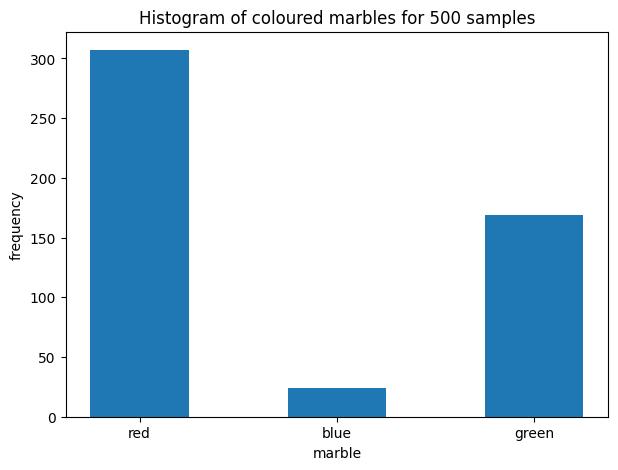

In [12]:
# We can count the number of coloured marbles chosen
marble_counter = {k: 0 for k in ["red", "green", "blue"]}
for i in marble_sample:
    marble_counter[i] += 1

print("Number of coloured marbles: ", marble_counter)

fig, ax = plt.subplots(figsize=(7,5))
ax.hist(marble_sample, bins=[-0.25, 0.25, 0.75, 1.25, 1.75, 2.25])
ax.set_xlabel("marble")
ax.set_ylabel("frequency")
ax.set_title(f"Histogram of coloured marbles for {n_samples} samples")

plt.show()

In [13]:
# Thus, we can estimate the proportion of marbles inside the bag 
# and see it approximates to the real values {red: 0.6, green: 0.35, blue: 0.05}
marble_proportion = {k: v/n_samples for k, v in marble_counter.items()}
print(f"Marble proportion for {n_samples} samples: ", marble_proportion)

Marble proportion for 500 samples:  {'red': 0.614, 'green': 0.338, 'blue': 0.048}


We see that the experiment for 500 samples yields an approximate proportion closely aligned to the real proportion. However, the differences between our experiment and the real values arise due to the limited number of samplings. In this set-up, 500 samples might not be a sufficiently good estimation for the marbles proportion. Theoretically, if the number of samples tends to infinity, we can recover the true underlying proportion. In order to understand this implication, we compute the marble proportion as we progresively draw more marbles, showing how the marble proportion evolves with respect to the number of samples.

In [14]:
# We repeat the experiment for a very long run of samples 
long_n_samples = 4_000
long_marble_sample = np.random.choice(population, size=long_n_samples)

In [15]:
# Create a 2-D numpy array where the rows (i) are each marble colour and the columns (j) represent each ordinal sample
colour_samples = np.zeros(shape=(3, long_n_samples))

# Fill with 1 if the marble colour i has been picked up in sample j
colour_samples[0, :] = np.where(long_marble_sample == "red", 1, 0)
colour_samples[1, :] = np.where(long_marble_sample == "green", 1, 0)
colour_samples[2, :] = np.where(long_marble_sample == "blue", 1, 0)

# Apply cumulative sum all marbles along the sampling direction
colour_samples = colour_samples.cumsum(axis=1, dtype=int)

# Divide each column by its ordinal sampling to obtain the proportion
ord_samples = np.arange(1, long_n_samples+1)
colour_proportion_samples = colour_samples / ord_samples

<a id="graph"></a>

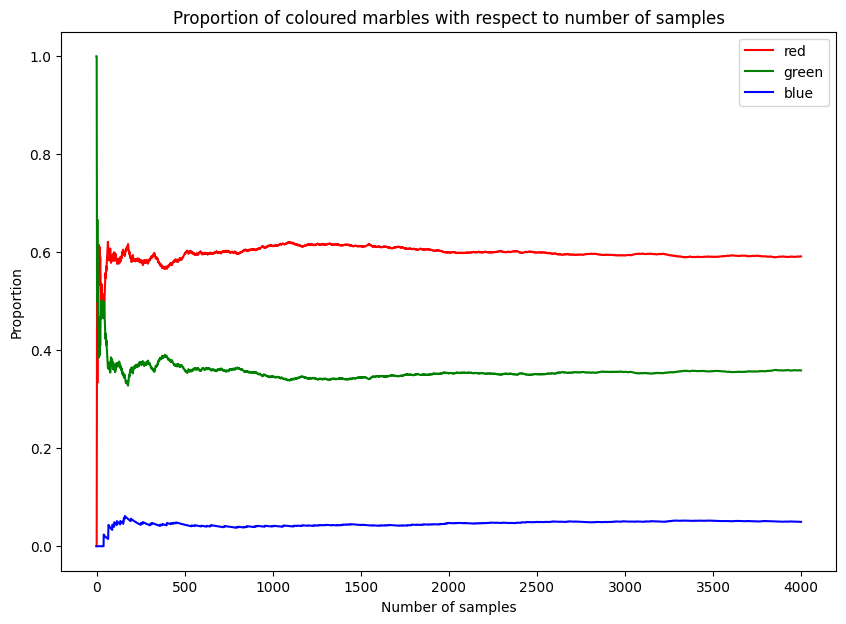

In [16]:
# Plot the proportion evolution with respect to the number of samplings
from cycler import cycler

fig, ax = plt.subplots(figsize=(10, 7))

c = ["red", "green", "blue"]
custom_c = cycler(color=c)
ax.set_prop_cycle(custom_c)
ax.plot(colour_proportion_samples.T)

ax.set_xlabel("Number of samples")
ax.set_ylabel("Proportion")
ax.set_title("Proportion of coloured marbles with respect to number of samples")
ax.legend(c)

plt.show()

We see how as the number of samples increases, the experimental proportion converges to the real values. In the limit, when the number of samples tends to infinity, the proportion of <span style="color:red">red</span>, <span style="color:green">green</span> and <span style="color:blue">blue</span> marbles will be equal to the true proportion value.

This concept that the experimental results converges to the true proportion as the number of samples becomes *really large* is an intuitive notion of the concept of probability. Yet it is slightly vague, since we cannot formally define what is meant by a *really large number*. Depending on the experiment, 1000 might be considered a really large number while for other experiments it might be insufficient. For a more detailed and mathematical explanation of probability see this [link](https://en.wikipedia.org/wiki/Probability#Mathematical_treatment). However, this brief example has helped us to build an approximation to the concept of probability and how to sample from a population of distribution. In the next section we introduce the notion of probability distributions.

<a id="probability"></a>
### C. Probability distributions

Once we have grasped an intuition about probability, we can introduce the notion of distributions. These lines provide only a quick introduction to the realm of probability. For a more detailed explanation about probability and distributions, please see the online version of the book [Introduction to Probability, Statistics and Random Processes](https://www.probabilitycourse.com/).  

A **probability distribution** is a mathematical function indicating the likelihood of different possible outcomes in an experiment. By using a distribution, we can quantify the probabilities related to each possible outcomes. Generally, we have a probability distribution associated with a random variable, i.e. we say that a random variable $X$ follows a probability distribution. A random variable is essentially a real-value function that assigns a numerical value to each possible outcome of the experiment. There are two main types of random variables: discrete and continuous. 

A random variable is considered discrete if its range (the possible outcomes of the experiment) is a countable set. Conversely, a random variable is continuous if its range is represented by an interval on the real number line, denoted as  $\mathbb{R}$. To illustrate this distinction, let us consider a random variable describing the random marble draw from the bag in the previous subsection. In this scenario, the random variable is discrete since the range is a countable set (red $R$, green $G$ or blue $B$): $\{R, G, B\}$. In contrast, let us consider a random variable describing tomorrow's temperature $T$. This random variable is continuous given that the temperature might be, for example, any real number between $[-5°, 36°]$. 

Continuous probability distributions are characterised by **probability density functions** (PDFs), $f_{X}(x)$. PDFs represent the relative likelihood of a random variable taking on different values within a specific interval. We mention here a specific interval, since assigning a probability to a specific value becomes meaningless in the context of continuous random variables as the probability of any single value will be vanishingly small. This occurs because continuous random variables can take on an infinite number of possible values within a given range or interval. The concept of assigning a precise probability to a single value within that infinite range becomes impractical. Instead, we focus on the probability of the variable falling within a certain interval or range. Going back to our previous temperature example, this means that the probability of observing tomorrow's temperature at **exactly** 16° is zero, which is represented mathematically as $P(T = 16°) = 0$. In this case, we are more interested in the probability of tomorrow's temperature above or below a given threshold or between an interval, e.g., $P(T > 30°), P(T < 20°)$ or $P(12 < T \leq 22)$. 

The area under the PDF within an given interval indicates the probability associated with that interval. Hence, knowing the functional form of the PDF allows us to compute the area under the curve to obtain the associated probability of a specific interval. If we consider the whole range of the random variable, its area under the PDF must be equal to 1. This ensures that the sum of probabilities for all possible outcomes of the experiment is 1.

The concept of PDF also applies to discrete random variables. However, in this case the probability of a particular value or item is nonzero. Consider the marbles example of the previous subsection, being $Y$ the random variable of choosing a marble from the bag. From the set of possible outcomes $\{R, G, B\}$, we know that $P(Y=R) = 0.6, \, P(Y = G) = 0.35, \, P(Y = B) = 0.05$, with this discrete PDF summing 1. Hereinafter, we restrict our attention to continuous random variables.

Often, we are interested in statistical properties of a random variable $X$. These statistical quantities offer valuable insights into the behaviour of $X.$ Here, we focus on two important features, the **expected value** and the **variance**. The expected value, often referred as the mean, represents the average value of the random variable. It is calculated as the probability-weighted average of the values in the range of the random variable, commonly denoted  as $\mathbb{E}[X]$. On the other hand, the variance $Var(X)$ quantifies to which extent the distribution of the random variable deviates from its mean value. Mathematically, it is calculated as the expected value of the squared difference between the random variable and its mean, $Var(X) = \mathbb{E}[(X - \mathbb{E}[X])^2]$. 

Natural processes and social phenomena often involve measured quantities can take any value within a certain interval. These quantities can be effectively modelled as a random variable following a particular PDF. Depending on the underlying phenomena generating the random variable, the corresponding PDF will exhibit different shapes and properties. We can find numerous examples of continuous probability distributions such as the normal (Gaussian), exponential or uniform distribution. Each distribution has its own mathematical function that yields different PDF shape, making them suitable for different types of real-world applications. Below, we introduce some of the most typical distribution encountered and how they are implemented in `numpy`.

#### Uniform distribution

\begin{align}
 f_X(x) = \left\{
\begin{array}{l l}
\frac{1}{b-a} & \quad a < x < b\\
 0 & \quad x < a \textrm{ or } x > b
\end{array} \right.
\end{align}

\begin{align}
\mathbb{E}[X] = \frac{a+b}{2} \quad Var(X) = \frac{(b-a)^2}{12}
\end{align}


This distribution appears when we can choose any real number uniformly in the range $[a, b]$. The term uniform implies that all subintervals within $[a, b]$ having equivalent length must have the same probability. In the graph below, the green line represents the theoretical PDF, while the blue histogram is a collection of random samples taken from the uniform distribution which is already implemented in `numpy`.

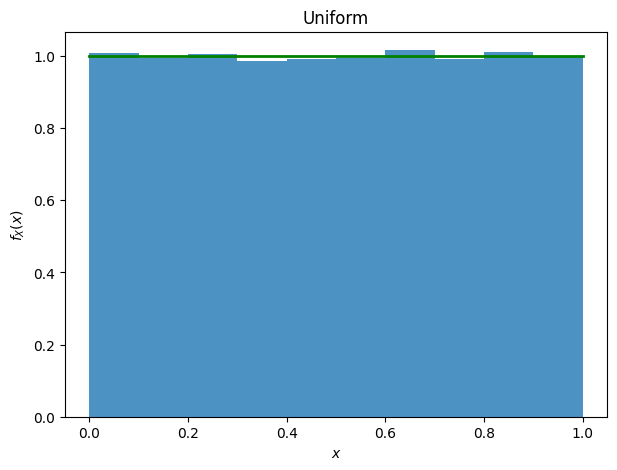

In [17]:
a = 0  # lower bound
b = 1  # upper bound
# This draws 100_000 random samples following a uniform distribution
random_uniform = np.random.uniform(a, b, size=100_000)

x = np.linspace(0, 1, 100)
uniform_function = np.ones_like(x) * 1/(b-a)

fig, ax = plt.subplots(figsize=(7, 5))
# density=True renormalise the height of the histogram so that the area under the histogram is 1, i.e. a PDF
ax.hist(random_uniform, density=True, alpha=.8)
ax.plot(x, uniform_function, color="green", lw=2)
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$f_{X}(x)$")
ax.set_title("Uniform")
plt.show()

#### Normal (Gaussian) distribution

\begin{align}
f_X(x)&=\frac{1}{ \sigma\sqrt{2 \pi}} \exp\left\{-\frac{(x-\mu)^2}{2\sigma^2}\right\}, \hspace{20pt} \textrm{for all } x \in \mathbb{R}
\end{align}

\begin{align}
 \mathbb{E}[X] = \mu \quad Var(X) = \sigma^2
\end{align}

This well-known distribution is represented through a symmetric PDF that resembles a bell-shape curve. It is often used to model measurements that concentrates around a central value, with fewer observations deviating significantly from the central value. The central value is knwon as the mean $\mu$, while the dispersion with respect to the central value is knwon as the standard deviation $\sigma$. If $X$ follows a normal distribution with mean $\mu$ and standard deviation $\sigma$, we can represent it as $X \sim \mathcal{N}(\mu, \sigma^2)$. 

A sepcial case is when $\mu=0$ and $\sigma=1$, which is so-called a standard normal distribution, denoted as $\mathcal{N}(0, 1)$. In the graph below, the green line represents the theoretical PDF, while the blue histogram is a collection of random samples taken from the normal distribution implemented in `numpy`.

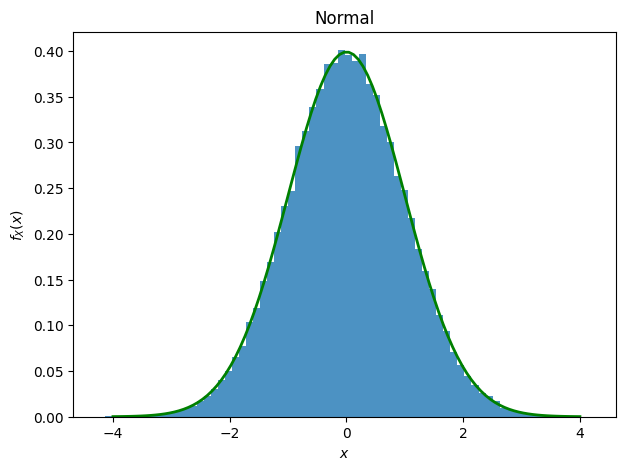

In [18]:
mu = 0  # mean
sigma = 1  # standard deviation
random_normal = np.random.normal(mu, sigma, size=100_000)

x = np.linspace(-4, 4, 100)
normal_function = 1/np.sqrt(2*np.pi)*np.exp(-x**2/2)

fig, ax = plt.subplots(figsize=(7, 5))
ax.hist(random_normal, density=True, bins=70, alpha=.8)
ax.plot(x, normal_function, color="green", lw=2)
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$f_{X}(x)$")
ax.set_title("Normal")
plt.show()

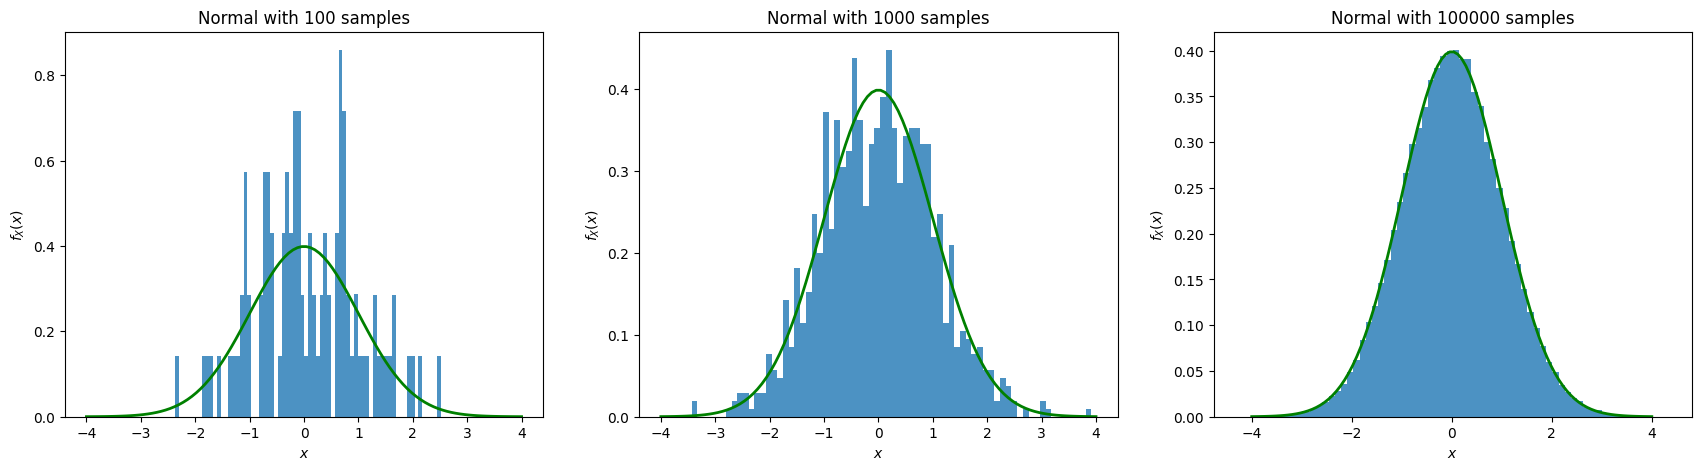

In [19]:
# Note how increasing the number of samples drawn yields a better approximation to the theoretical function
random_normal_1 = np.random.normal(mu, sigma, size=100)
random_normal_2 = np.random.normal(mu, sigma, size=1_000)
random_normal_3 = np.random.normal(mu, sigma, size=100_000)

fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(21, 5))

ax0.hist(random_normal_1, density=True, bins=70, alpha=.8)
ax0.plot(x, normal_function, color="green", lw=2)
ax0.set_xlabel(r"$x$")
ax0.set_ylabel(r"$f_{X}(x)$")
ax0.set_title("Normal with 100 samples")

ax1.hist(random_normal_2, density=True, bins=70, alpha=.8)
ax1.plot(x, normal_function, color="green", lw=2)
ax1.set_xlabel(r"$x$")
ax1.set_ylabel(r"$f_{X}(x)$")
ax1.set_title("Normal with 1000 samples")

ax2.hist(random_normal_3, density=True, bins=70, alpha=.8)
ax2.plot(x, normal_function, color="green", lw=2)
ax2.set_xlabel(r"$x$")
ax2.set_ylabel(r"$f_{X}(x)$")
ax2.set_title("Normal with 100000 samples")

plt.show()

An important property of normal random variables is that we can always represent any normal distribution in terms of the standard normal distribution $\mathcal{N}(0, 1).$ If $X \sim \mathcal{N}(0, 1)$, we only have to shift and scale the standard normal distribution:

\begin{align}
Z &= \sigma X + \mu
\end{align}

\begin{align}
\mathbb{E}[Z] = \mu \quad Var(Z) = \sigma^2
\end{align}

Hence, $Z$ is normal distribution with mean $\mu$ and standard variation $\sigma$, i.e. $Z \sim \mathcal{N}(\mu, \sigma^2)$. Below, we compare two different normal distributions.

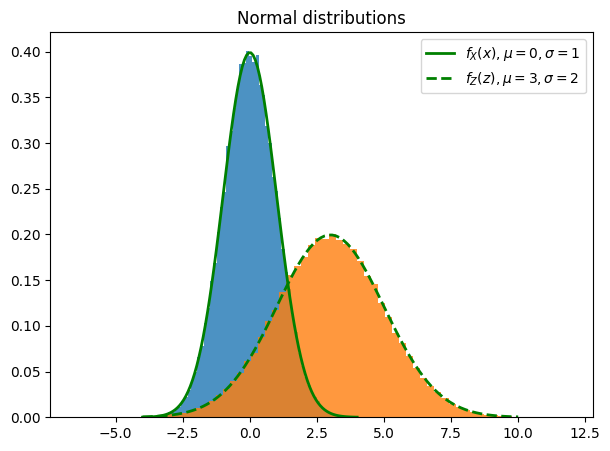

In [20]:
mu_2 = 3  # mean
sigma_2 = 2  # standard deviation
random_normal_2 = np.random.normal(mu_2, sigma_2, size=100_000)

z = np.linspace(-4, 10, 100)
normal_function_2 = 1/(sigma_2 * np.sqrt(2*np.pi)) * np.exp(-(z - mu_2)**2/ (2*sigma_2**2))

fig, ax = plt.subplots(figsize=(7, 5))

ax.hist(random_normal, density=True, bins=70, alpha=.8)
ax.plot(x, normal_function, color="green", lw=2, label=r"$f_{X}(x), \mu = 0, \sigma =1$")

ax.hist(random_normal_2, density=True, bins=70, alpha=.8)
ax.plot(z, normal_function_2, color="green", lw=2, ls='--', label=r"$f_{Z}(z), \mu = 3, \sigma = 2$")

ax.set_title("Normal distributions")
ax.legend()
plt.show()

#### Exponential distribution

\begin{align}
 f_X(x) = \left\{
\begin{array}{l l}
\lambda e^{-\lambda x} & \quad x > 0\\
0 & \quad \textrm{otherwise}
\end{array} \right.
\end{align}

\begin{align}
 \mathbb{E}[X] = \frac{1}{\lambda} \quad Var(X) = \frac{1}{\lambda^2}
\end{align}

The exponential distribution is widely used to model the time elapsed between events. It is governed by the parameter $\lambda$, called the rate parameter. Intuitively, a lower rate parameter $\lambda$ corresponds to a longer average time between events, as inferred from the expected value. In the next figure, we show a comparison between the theoretical PDF (green line) and an ensemble of random samples drawn from the `numpy` implementation of the exponential distribution.

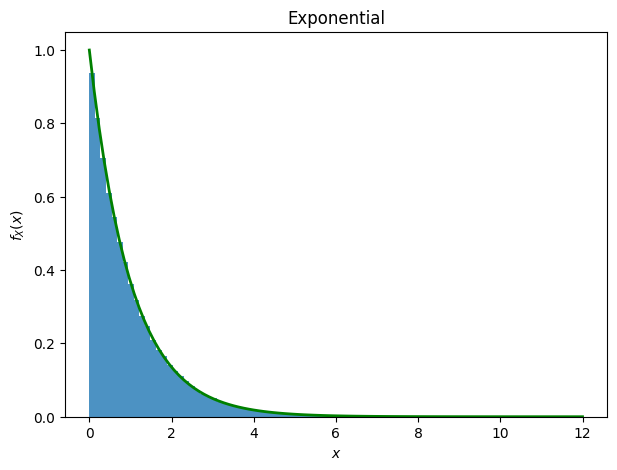

In [21]:
l = 1 # rate parameter
random_exponential = np.random.exponential(scale=l, size=100_000)

x = np.linspace(0, 12, 100)
exponential_function = np.exp(-x)

fig, ax = plt.subplots(figsize=(7, 5))
ax.hist(random_exponential, density=True, bins=70, alpha=.8)
ax.plot(x, exponential_function, color="green", lw=2)
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$f_{X}(x)$")
ax.set_title("Exponential")
plt.show()

### Conclusions

That concludes the second of our series of notebooks. We have covered important concepts regarding random numbers, sampling and probability distributions. We hope this introduction has provided you with basic understanding of these topics and their practical implementation in Python. We leave you an extra exercise to practice and test you knowledge so far. Happy coding!  

### Try it yourself!

**Problem**: Let us consider a *biased* six-sided die, where each face has a different probability of being rolled. For example: 

$$ \{"\textbf{1}":  0.2, \quad "\textbf{2}": 0.1, \quad "\textbf{3}": 0.1, \quad "\textbf{4}": 0.2, \quad "\textbf{5}": 0.35, \quad "\textbf{6}": 0.05 \} $$

The aim is to draw a large number of samples simulating the rolling of the biased die and record the frequency of each face to draw conclusions on the sampling rate. Your tasks are:

1. Code the sampling procedure using `numpy`.
2. Compute the empirical probability for each face after each sample.
3. Plot the empirical probability with respect to the number of samples as we did in [section B](#graph).

To prepare for the next notebook, try to implement a function that receives an user-defined number of samples and the probability array of each face.

*Hint*: Recall the `np.random.choice()` function in numpy.